In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

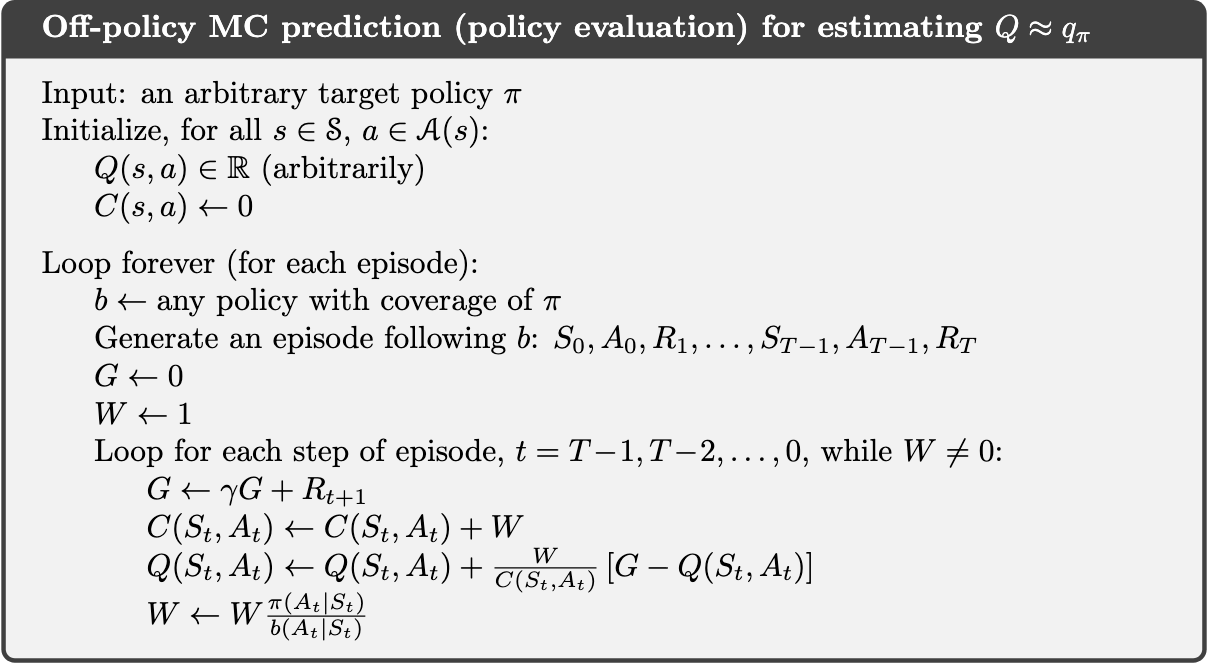

In [16]:
def off_policy_MC_prediction(env, policy, b_eps=0.05, discount_factor=0.99, episodes=10000, max_t=100):
    nS = env.observation_space.n
    nA = env.action_space.n

    Q = defaultdict(lambda: np.zeros(nA))
    C = defaultdict(lambda: np.zeros(nA))


    for i in range(episodes):

        #setup behavior policy
        uniform = np.ones_like(policy, dtype=float) / nA
        b = (1-b_eps) * policy + b_eps * uniform

        #generate episode with b
        episode = []
        state, _ = env.reset()
        steps = 0
        while(True):
            action = np.random.choice(nA, p=b[state])
            s_next, reward, term, trun, _ = env.step(action)
            steps+=1
            episode.append((state, action, reward))
            if term or trun:
                break
            if max_t is not None and steps >= max_t:
                break
            state = s_next
        
        G = 0.0
        W = 1.0

        for t in reversed(range(len(episode))):
            if W != 0.0:
                s, a, r = episode[t]
                G = discount_factor*G + r
                C[s][a] = C[s][a] + W
                Q[s][a] = Q[s][a] + (W/C[s][a])*(G-Q[s][a])
                W = W*(policy[s][a]/b[s][a])
            else:
                break
            
    return Q

